In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pylab
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats.distributions import chi2
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt, VAR
from  statsmodels.tsa.holtwinters import ExponentialSmoothing as hw_exponential
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.stats.stattools import durbin_watson
%matplotlib inline

In [3]:
data = pd.read_csv('datasets_4538_7213_ETFs_aadr.us.txt')

In [4]:
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-07-21,24.333,24.333,23.946,23.946,43321,0
1,2010-07-22,24.644,24.644,24.362,24.487,18031,0
2,2010-07-23,24.759,24.759,24.314,24.507,8897,0
3,2010-07-26,24.624,24.624,24.449,24.595,19443,0
4,2010-07-27,24.477,24.517,24.431,24.517,8456,0


In [5]:
data.Date = pd.to_datetime(data.Date)

In [6]:
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-07-21,24.333,24.333,23.946,23.946,43321,0
1,2010-07-22,24.644,24.644,24.362,24.487,18031,0
2,2010-07-23,24.759,24.759,24.314,24.507,8897,0
3,2010-07-26,24.624,24.624,24.449,24.595,19443,0
4,2010-07-27,24.477,24.517,24.431,24.517,8456,0


In [7]:
data.describe()

,Open,High,Low,Close,Volume,OpenInt
count,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.0
mean,36.014550,36.137120,35.855319,35.987517,6452.979553,0.0
std,6.957747,7.002548,6.878264,6.933814,12047.101114,0.0
min,23.936000,23.946000,23.867000,23.946000,2.000000,0.0
25%,29.829000,29.966000,29.819000,29.862000,529.000000,0.0
50%,36.512000,36.571000,36.322000,36.464000,1559.000000,0.0
75%,38.957000,39.123000,38.787000,38.838000,5993.000000,0.0
max,58.620000,58.720000,57.700000,58.430000,106139.000000,0.0


In [8]:
data.Date.describe()

count                    1565
unique                   1565
top       2016-09-08 00:00:00
freq                        1
first     2010-07-21 00:00:00
last      2017-11-10 00:00:00
Name: Date, dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 7 columns):
Date       1565 non-null datetime64[ns]
Open       1565 non-null float64
High       1565 non-null float64
Low        1565 non-null float64
Close      1565 non-null float64
Volume     1565 non-null int64
OpenInt    1565 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 85.7 KB


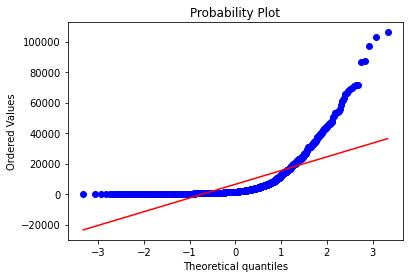

In [10]:
scipy.stats.probplot(data.Volume, plot=pylab)
pylab.show()

In [11]:
data.set_index('Date', inplace=True)

In [12]:
data.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2010-07-21,24.333,24.333,23.946,23.946,43321,0
2010-07-22,24.644,24.644,24.362,24.487,18031,0
2010-07-23,24.759,24.759,24.314,24.507,8897,0
2010-07-26,24.624,24.624,24.449,24.595,19443,0
2010-07-27,24.477,24.517,24.431,24.517,8456,0


In [13]:
data = data.asfreq('d')

In [14]:
data.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2010-07-21,24.333,24.333,23.946,23.946,43321.0,0.0
2010-07-22,24.644,24.644,24.362,24.487,18031.0,0.0
2010-07-23,24.759,24.759,24.314,24.507,8897.0,0.0
2010-07-24,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-25,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data =data.asfreq('b')

In [16]:
data.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2010-07-21,24.333,24.333,23.946,23.946,43321.0,0.0
2010-07-22,24.644,24.644,24.362,24.487,18031.0,0.0
2010-07-23,24.759,24.759,24.314,24.507,8897.0,0.0
2010-07-26,24.624,24.624,24.449,24.595,19443.0,0.0
2010-07-27,24.477,24.517,24.431,24.517,8456.0,0.0


In [17]:
data.isna().sum()

Open       343
High       343
Low        343
Close      343
Volume     343
OpenInt    343
dtype: int64

In [18]:
data.Open = data.Open.fillna(method='ffill')
data.High = data.High.fillna(method='ffill')
data.Low = data.Low.fillna(method='ffill')
data.Close = data.Close.fillna(method='ffill')
data.Volume = data.Volume.fillna(method='ffill')
data.OpenInt = data.OpenInt.fillna(method='ffill')

In [19]:
data.isna().sum()

Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [187]:
sts.adfuller(data.Open)

(1.0122176289481521,
 0.994393200568859,
 4,
 1902,
 {'1%': -3.4337927694028645,
  '5%': -2.8630607871429614,
  '10%': -2.567579609288358},
 2208.9993640147927)

so the above value says that data is non-stationary

In [21]:
wn = np.random.normal(loc = data.Open.mean(), scale = data.Open.std(), size = data.Open.shape[0])

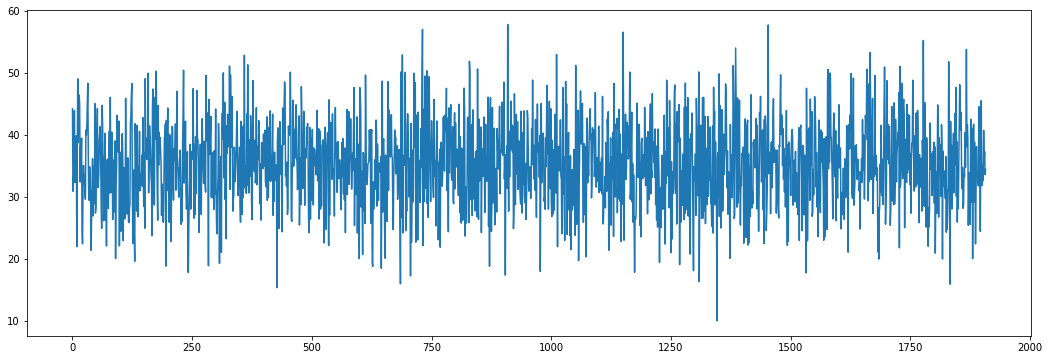

In [22]:
plt.figure(figsize=(18,6))
plt.plot(wn)

#### Stationary means that 'mean' and 'standard deviation' is constant over time and there is no seasonality. seasonality means a periodic manner, like sine over a year. for example, a sine wave has constant mean and std over time, but it is periodic. periodic manner over multiple years is cycle

#### white noise has constant mean and standard deviation and has no correlation between different lag( in ACF graph, all bars are under significant level). the best model is which that residuals (errors) is white noise.

## Adfuller Test:
The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

### Null Hypothesis (H0):
If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
### Alternate Hypothesis (H1):
The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

also we can compare adf-test statistics(first element of result) with the critical values; if adf-test statistics is lower than critical values, so the null hypothesis is rejected. in below example, the adf-test statistics is -28.73 and 5% critical value is -2.86, so -28.73<-2.86 so the null hypothesis is rejected, means that the data is stationary. also in below example, p-value is 0.0 which is lower than 5%, so the null hypothesis is rejected

In [23]:
sts.adfuller(wn)

(-42.56567573002182,
 0.0,
 0,
 1907,
 {'1%': -3.4337837305451755,
  '5%': -2.863056796670872,
  '10%': -2.5675774845276518},
 12563.09275159817)

In [24]:
season_additive = seasonal_decompose(data.Open, model = 'additive')

E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Ma

[]

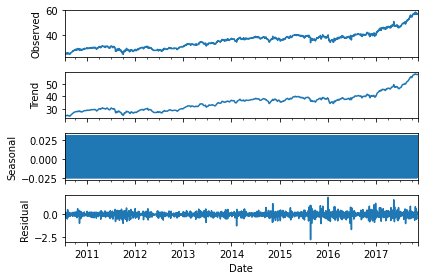

In [26]:
season_additive.plot()
plt.plot()

E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Ma

[]

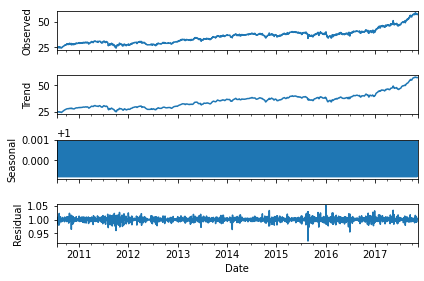

In [27]:
season_multipl = seasonal_decompose(data.Open, model = 'multiplicative')
season_multipl.plot()
plt.plot()

In [29]:
season_multipl.resid[:5]

Date
2010-07-21         NaN
2010-07-22         NaN
2010-07-23    1.007651
2010-07-26    1.001914
2010-07-27    0.996101
Freq: B, Name: Open, dtype: float64

In [31]:
mult_resid = season_multipl.resid.dropna()

In [32]:
sts.adfuller(mult_resid)

(-15.558970025615091,
 2.0541343612074725e-28,
 23,
 1880,
 {'1%': -3.433833112339179,
  '5%': -2.8630785975831463,
  '10%': -2.5675890926324128},
 -13524.151142276161)

<Figure size 720x432 with 0 Axes>

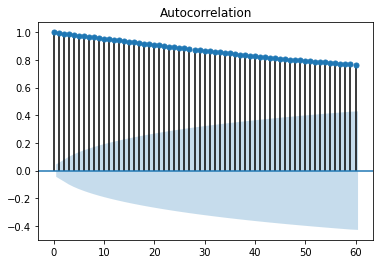

In [34]:
plt.figure(figsize=(10,6))
sgt.plot_acf(data.Open ,lags=60)
plt.show()

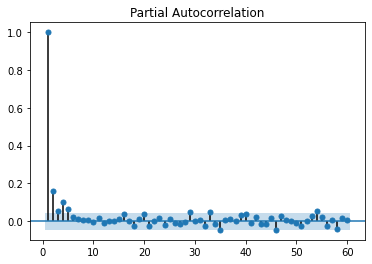

In [35]:
sgt.plot_pacf(data.Open , lags=60, method='ols', zero=False)
plt.show()

also the acf plot says data is non-stationary

### Partial autocorrelation means direct effect of different lags, but autocorrelation means direct and indirect effect of lags
### For AR processes, the ACF decreases slowly but PACF shuts down quicly, for MA processes the PACF decreases slowly and ACF shuts quicly. in AR(p), the p is lags of PACF where p lags are significant. in MA(q), q is the lags until ACF get unsignificant

In [40]:
data_train = data.iloc[:800]
data_test = data.iloc[800:]

In [49]:
data_test.head(2)

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2013-08-14,33.450,33.489,33.450,33.469,12253.0,0.0
2013-08-15,32.815,33.226,32.815,33.226,1647.0,0.0


In [50]:
data_test.tail(2)

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2017-11-09,57.23,57.23,56.7100,56.9265,53130.0,0.0
2017-11-10,56.96,56.96,56.3909,56.4000,29233.0,0.0


In [58]:
ar1_model = ARMA(data_train.Open, order=(1,0))

In [59]:
result_ar1 = ar1_model.fit()

In [60]:
result_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Open   No. Observations:                  800
Model:                     ARMA(1, 0)   Log Likelihood                -264.306
Method:                       css-mle   S.D. of innovations              0.336
Date:                Tue, 04 Aug 2020   AIC                            534.612
Time:                        13:54:37   BIC                            548.666
Sample:                    07-21-2010   HQIC                           540.011
                         - 08-13-2013                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0920      1.233     23.589      0.000      26.675      31.509
ar.L1.Open     0.9915      0.005    196.790      0.000       0.982       1.001
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0085           +0.0000j            1.0085            0.0000
-----------------------------------------------------------------------------
"""

### AIC & BIC should be lowered. lower AIC & BIC, better model.
### z = coef/std_err.
### p>|z| should be lower than 0.05. if it is greater than 0.05, that parameter is not good.

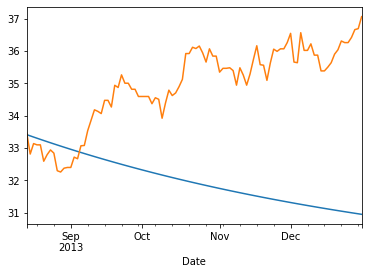

In [63]:
pred = result_ar1.predict(start =pd.to_datetime('2013-08-14') , end = pd.to_datetime('2013-12-31'))
pred.plot()
data_test[pd.to_datetime('2013-08-14') : pd.to_datetime('2013-12-31')].Open.plot()
plt.show()

above we see that the prediction has a huge error. the reason is data none-stationary (mean increasing over time) but we used a stationary modeling.

In [65]:
ar2_model = ARMA(data_train.Open, order=(2,0))

In [66]:
ar2_result = ar2_model.fit()

In [67]:
ar2_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Open   No. Observations:                  800
Model:                     ARMA(2, 0)   Log Likelihood                -263.109
Method:                       css-mle   S.D. of innovations              0.335
Date:                Tue, 04 Aug 2020   AIC                            534.217
Time:                        13:58:23   BIC                            552.956
Sample:                    07-21-2010   HQIC                           541.416
                         - 08-13-2013                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0854      1.331     21.846      0.000      26.476      31.695
ar.L1.Open     0.9374      0.035     26.556      0.000       0.868       1.007
ar.L2.Open     0.0549      0.035      1.549      0.122      -0.015       0.124
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0073           +0.0000j            1.0073            0.0000
AR.2          -18.0850           +0.0000j           18.0850            0.5000
-----------------------------------------------------------------------------
"""

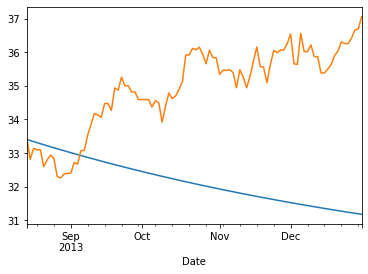

In [68]:
pred = ar2_result.predict(start =pd.to_datetime('2013-08-14') , end = pd.to_datetime('2013-12-31'))
pred.plot()
data_test[pd.to_datetime('2013-08-14') : pd.to_datetime('2013-12-31')].Open.plot()
plt.show()

In [68]:
ar3_model = ARMA(data_train.Open, order=(3,0))
ar4_model = ARMA(data_train.Open , order=(4,0))

In [69]:
ar3_result = ar3_model.fit()
ar4_result = ar4_model.fit()

In [70]:
ar3_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Open   No. Observations:                  800
Model:                     ARMA(3, 0)   Log Likelihood                -261.743
Method:                       css-mle   S.D. of innovations              0.335
Date:                Sun, 02 Aug 2020   AIC                            533.486
Time:                        19:17:51   BIC                            556.910
Sample:                    07-21-2010   HQIC                           542.485
                         - 08-13-2013                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0787      1.446     20.110      0.000      26.245      31.913
ar.L1.Open     0.9342      0.035     26.466      0.000       0.865       1.003
ar.L2.Open     0.0004      0.048      0.007      0.994      -0.094       0.095
ar.L3.Open     0.0586      0.035      1.654      0.098      -0.011       0.128
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0062           -0.0000j            1.0062           -0.0000
AR.2           -0.5062           -4.0880j            4.1192           -0.2696
AR.3           -0.5062           +4.0880j            4.1192            0.2696
-----------------------------------------------------------------------------
"""

In [71]:
ar4_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Open   No. Observations:                  800
Model:                     ARMA(4, 0)   Log Likelihood                -259.435
Method:                       css-mle   S.D. of innovations              0.334
Date:                Sun, 02 Aug 2020   AIC                            530.870
Time:                        19:18:06   BIC                            558.978
Sample:                    07-21-2010   HQIC                           541.668
                         - 08-13-2013                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0664      1.612     18.029      0.000      25.906      32.226
ar.L1.Open     0.9297      0.035     26.370      0.000       0.861       0.999
ar.L2.Open     0.0003      0.048      0.007      0.994      -0.094       0.095
ar.L3.Open    -0.0120      0.048     -0.250      0.803      -0.107       0.082
ar.L4.Open     0.0761      0.035      2.152      0.032       0.007       0.145
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0050           -0.0000j            1.0050           -0.0000
AR.2            0.8462           -2.1063j            2.2699           -0.1892
AR.3            0.8462           +2.1063j            2.2699            0.1892
AR.4           -2.5390           -0.0000j            2.5390           -0.5000
-----------------------------------------------------------------------------
"""

In [72]:
ar4_result.llf

-259.4349294246896

In [73]:
ar3_result.llf

-261.7432478875563

In [75]:
data_train['open_return'] = data_train.Open.pct_change(1).mul(100)

C:\Users\98914\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
data_train.head()

,Open,High,Low,Close,Volume,OpenInt,open_return
Date,,,,,,,
2010-07-21,24.333,24.333,23.946,23.946,43321.0,0.0,NaN
2010-07-22,24.644,24.644,24.362,24.487,18031.0,0.0,1.278100
2010-07-23,24.759,24.759,24.314,24.507,8897.0,0.0,0.466645
2010-07-26,24.624,24.624,24.449,24.595,19443.0,0.0,-0.545256
2010-07-27,24.477,24.517,24.431,24.517,8456.0,0.0,-0.596979


In [77]:
data_train = data_train.iloc[1:]

In [78]:
data_train.head()

,Open,High,Low,Close,Volume,OpenInt,open_return
Date,,,,,,,
2010-07-22,24.644,24.644,24.362,24.487,18031.0,0.0,1.278100
2010-07-23,24.759,24.759,24.314,24.507,8897.0,0.0,0.466645
2010-07-26,24.624,24.624,24.449,24.595,19443.0,0.0,-0.545256
2010-07-27,24.477,24.517,24.431,24.517,8456.0,0.0,-0.596979
2010-07-28,24.477,24.517,24.352,24.431,4967.0,0.0,0.000000


In [79]:
sts.adfuller(data_train.open_return)

(-18.78057116323279,
 2.0242850111974835e-30,
 2,
 796,
 {'1%': -3.4385918508847646,
  '5%': -2.865177791819505,
  '10%': -2.568707096601096},
 2450.983252326458)

### the adf-test is -18.78 and 5% critical value is -2.86 => -18.78 < -2.86 => data.open_return is stationary

In [70]:
data['open_return'] = data.Open.pct_change(1).mul(100)

In [71]:
data.head()

,Open,High,Low,Close,Volume,OpenInt,open_return
Date,,,,,,,
2010-07-21,24.333,24.333,23.946,23.946,43321.0,0.0,NaN
2010-07-22,24.644,24.644,24.362,24.487,18031.0,0.0,1.278100
2010-07-23,24.759,24.759,24.314,24.507,8897.0,0.0,0.466645
2010-07-26,24.624,24.624,24.449,24.595,19443.0,0.0,-0.545256
2010-07-27,24.477,24.517,24.431,24.517,8456.0,0.0,-0.596979


In [72]:
data.dropna(inplace=True)

In [73]:
data.shape

(1907, 7)

In [74]:
train_data = data.iloc[:1400]
test_data = data.iloc[1400:]

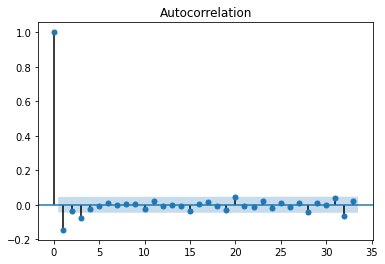

In [76]:
sgt.plot_acf(data.open_return)
plt.show()

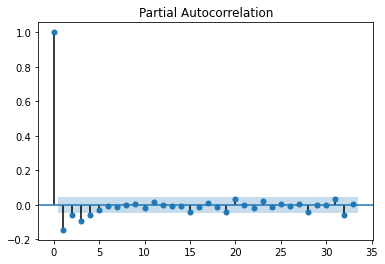

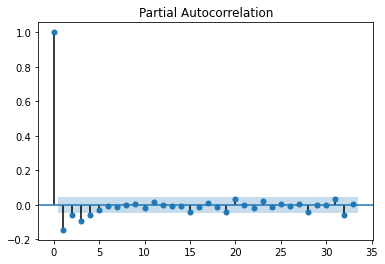

In [77]:
sgt.plot_pacf(data.open_return)

In [107]:
ar3_model = ARMA(train_data.open_return, order=(3,0)).fit()

In [108]:
ar3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            open_return   No. Observations:                 1400
Model:                     ARMA(3, 0)   Log Likelihood               -2226.388
Method:                       css-mle   S.D. of innovations              1.187
Date:                Tue, 04 Aug 2020   AIC                           4462.776
Time:                        14:21:39   BIC                           4488.997
Sample:                    07-22-2010   HQIC                          4472.578
                         - 12-02-2015                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0405      0.024      1.672      0.095      -0.007       0.088
ar.L1.open_return    -0.1642      0.027     -6.153      0.000      -0.216      -0.112
ar.L2.open_return    -0.0835      0.027     -3.100      0.002      -0.136      -0.031
ar.L3.open_return    -0.0613      0.027     -2.300      0.022      -0.114      -0.009
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6492           -2.3891j            2.4757           -0.2078
AR.2            0.6492           +2.3891j            2.4757            0.2078
AR.3           -2.6596           -0.0000j            2.6596           -0.5000
-----------------------------------------------------------------------------
"""

In [100]:
test_data.head(1)

,Open,High,Low,Close,Volume,OpenInt,open_return
Date,,,,,,,
2015-12-03,38.897,38.897,38.661,38.661,413.0,0.0,-0.051391


In [101]:
test_data.tail(1)

,Open,High,Low,Close,Volume,OpenInt,open_return
Date,,,,,,,
2017-11-10,56.96,56.96,56.3909,56.4,29233.0,0.0,-0.471781


In [109]:
pred = ar3_model.predict(start = pd.to_datetime('2015-12-03') , end=pd.to_datetime('2017-11-10'))

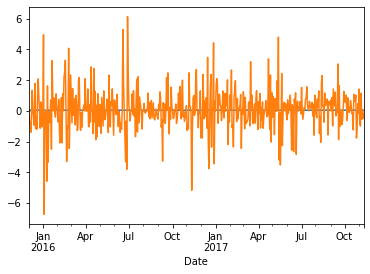

In [110]:
pred.plot()
test_data.open_return.plot()


In [111]:
residuals = test_data.open_return - pred

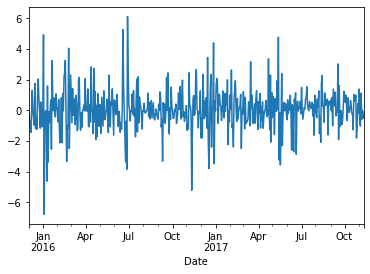

In [112]:
residuals.plot()

the above graph tells us that the model has been faild

lets use a arima model, because we made a diff(1)

In [133]:
arima1  = ARIMA(train_data.open_return, order = (3,1,0)).fit()

In [134]:
pred = arima1.predict(start = pd.to_datetime('2015-12-03') , end=pd.to_datetime('2017-11-10'))

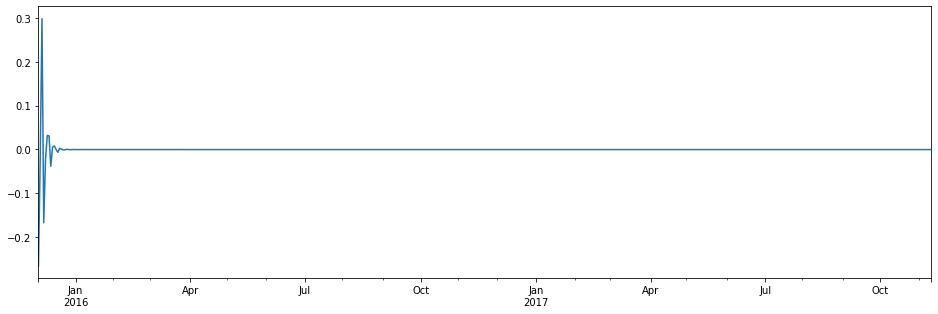

In [135]:
pred.plot(figsize=(16,5))

In [190]:
open_diff1_data =data.Open.diff()[1:]

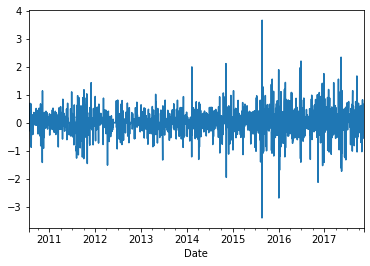

In [191]:
open_diff1_data.plot()

In [142]:
open_decomp = seasonal_decompose(open_diff1_data, 'additive')

E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Ma

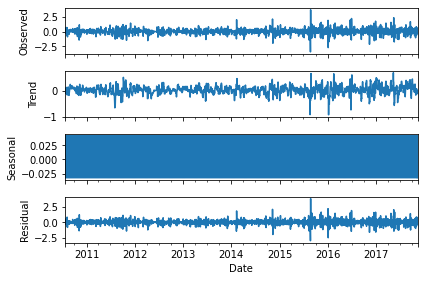

In [144]:
open_decomp.plot()
plt.show()

In [145]:
sts.adfuller(open_diff1_data)

(-26.38502417754054,
 0.0,
 3,
 1902,
 {'1%': -3.4337927694028645,
  '5%': -2.8630607871429614,
  '10%': -2.567579609288358},
 2207.633221576766)

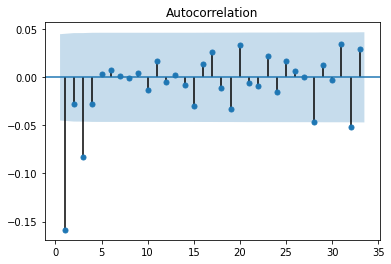

In [363]:
sgt.plot_acf(open_diff1_data, zero=False)
plt.show()

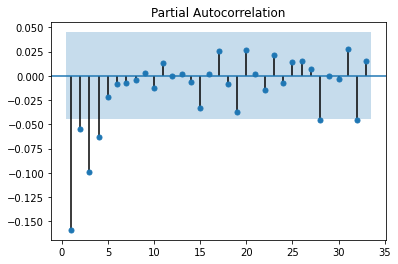

In [362]:
sgt.plot_pacf(open_diff1_data, zero=False)
plt.show()

In [364]:
train_data = open_diff1_data.iloc[:1500]
test_data = open_diff1_data.iloc[1500:]

In [366]:
arima2 = ARIMA(train_data, order=(1,1,1)).fit()

E:\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [367]:
arima2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Open   No. Observations:                 1499
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -767.727
Method:                       css-mle   S.D. of innovations              0.403
Date:                Wed, 05 Aug 2020   AIC                           1543.454
Time:                        00:22:00   BIC                           1564.705
Sample:                    07-26-2010   HQIC                          1551.371
                         - 04-21-2016                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.563e-06   2.05e-05     -0.222      0.824   -4.48e-05    3.57e-05
ar.L1.D.Open    -0.1700      0.025     -6.675      0.000      -0.220      -0.120
ma.L1.D.Open    -1.0000      0.002   -573.716      0.000      -1.003      -0.997
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -5.8840           +0.0000j            5.8840            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

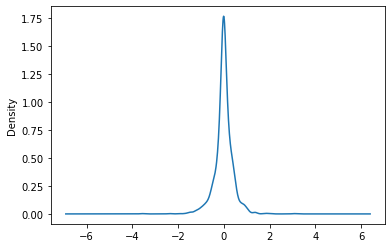

In [368]:
arima2.resid.plot(kind='kde')

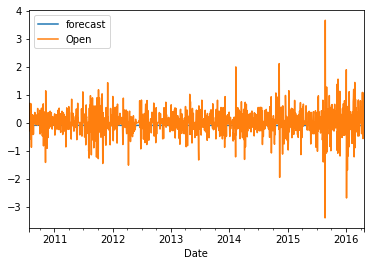

In [378]:
arima2.plot_predict(plot_insample =True,dynamic = True )
plt.show()

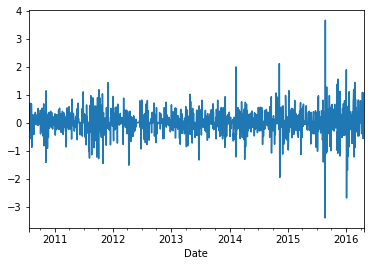

In [232]:
train_data.plot()

In [151]:
test_data.head(1)

Date
2016-04-22   -0.741
Freq: B, Name: Open, dtype: float64

In [152]:
test_data.tail(1)

Date
2017-11-10   -0.27
Freq: B, Name: Open, dtype: float64

In [376]:
# pred = arima2.forecast(steps = 200 )
pred = arima2.predict(start= pd.to_datetime('2016-04-22'), end= pd.to_datetime('2016-05-20'), dynamic = True, typ='levels' )

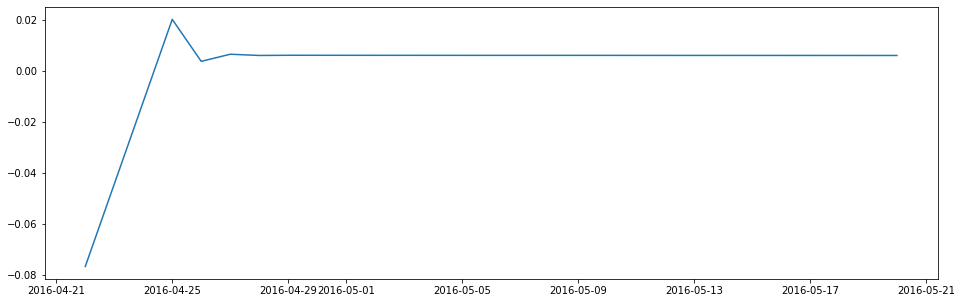

In [377]:
plt.figure(figsize=(16,5))
plt.plot(pred)


In [355]:
history = list(train_data.values)

In [357]:
len(history)

1500

In [359]:
history = list(train_data.values)
pred = []
for d in range(len(test_data.values[:200])):
    print(d)
    model = ARIMA(history, order=(3,1,0)).fit()
    p = model.forecast()[0][0]
    history.append(p)
    pred.append(p)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


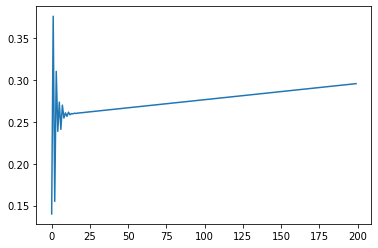

In [361]:
plt.plot(history[1500:])

### Lets use simple exponential smoothing

In [33]:
train_data = data.iloc[:1500].Open
test_data = data.iloc[1500:].Open
test_data.head(1)

Date
2016-04-20    38.84
Freq: B, Name: Open, dtype: float64

In [34]:
fit1 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.6, optimized=True)

In [35]:
forcast1 = fit1.forecast(20)

In [36]:
forcast1

2016-04-20    38.784509
2016-04-21    38.784509
2016-04-22    38.784509
2016-04-25    38.784509
2016-04-26    38.784509
2016-04-27    38.784509
2016-04-28    38.784509
2016-04-29    38.784509
2016-05-02    38.784509
2016-05-03    38.784509
2016-05-04    38.784509
2016-05-05    38.784509
2016-05-06    38.784509
2016-05-09    38.784509
2016-05-10    38.784509
2016-05-11    38.784509
2016-05-12    38.784509
2016-05-13    38.784509
2016-05-16    38.784509
2016-05-17    38.784509
Freq: B, dtype: float64

In [54]:
holt_model1 = Holt(train_data, exponential=True).fit(smoothing_level= 0.06, smoothing_slope=0.2,optimized=True)

In [55]:
pred = holt_model1.forecast(100)
# pred

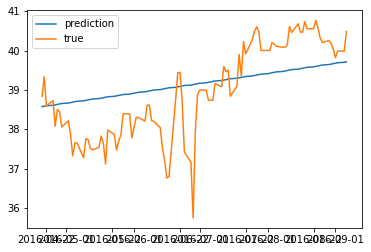

In [56]:
plt.plot(pred)
plt.plot(test_data[:100])
plt.legend(['prediction', 'true'])
plt.show()

In [57]:
holt_winter_m1 = ExponentialSmoothing(train_data,trend='add').fit()

In [58]:
hw_pre = holt_winter_m1.forecast(100)

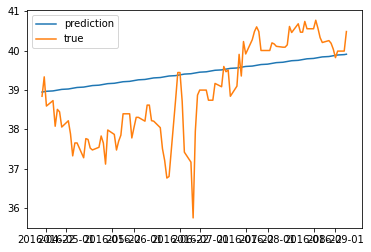

In [59]:
plt.plot(hw_pre)
plt.plot(test_data[:100])
plt.legend(['prediction', 'true'])
plt.show()

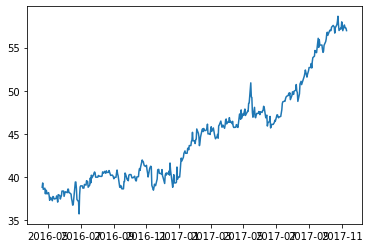

In [41]:
plt.plot(test_data)

In [239]:
ice_data = pd.read_csv('ice_cream.csv')

In [240]:
ice_data.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [241]:
ice_data.rename(columns={'DATE': 'date', 'IPN31152N': 'production'}, inplace=True)

In [242]:
ice_data.head(2)

,date,production
0,1972-01-01,59.9622
1,1972-02-01,67.0605


In [243]:
ice_data.date = pd.to_datetime(ice_data.date)

In [244]:
ice_data.set_index('date',inplace=True)

In [245]:
ice_data.head()

,production
date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [246]:
ice_data.tail(2)

,production
date,
2019-12-01,75.7094
2020-01-01,83.6290


In [247]:
start_date = pd.to_datetime('2010-01-01')

In [248]:
ice_data = ice_data[start_date:]

In [249]:
ice_data.isna().sum()

production    0
dtype: int64

In [250]:
ice_data.shape

(121, 1)

In [251]:
ice_data = ice_data.asfreq('MS')

In [252]:
ice_data.production.isna().sum()

0

In [253]:
ice_data.head(2)

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994


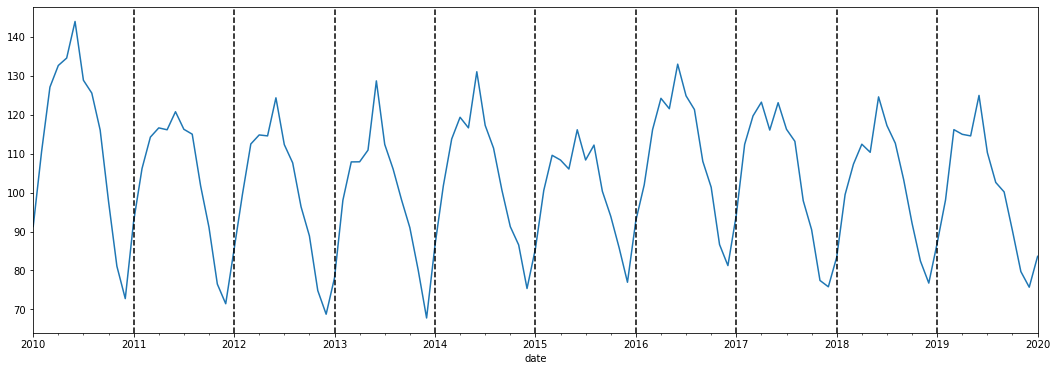

In [254]:
ice_data.production.plot(figsize=(18,6))
for year in range(2011,2020):
    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color= 'k',linestyle = '--')
plt.show()

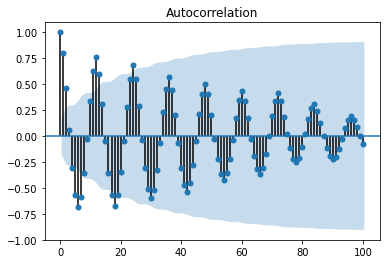

In [255]:
sgt.plot_acf(ice_data.production, lags=100)
plt.show()

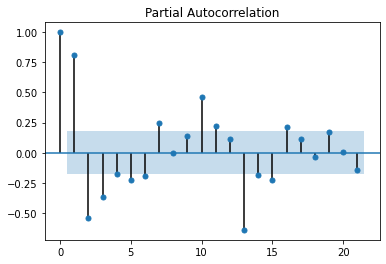

In [256]:
sgt.plot_pacf(ice_data.production)
plt.show()

In [260]:
sts.adfuller(ice_data.production)

(-3.4692068038611366,
 0.008814055324487239,
 13,
 107,
 {'1%': -3.492995948509562,
  '5%': -2.888954648057252,
  '10%': -2.58139291903223},
 623.0126017548499)

by the adfuller test, non-stationarity rejected, so data is stationary

In [257]:
split_date = pd.to_datetime('2018-01-01')

In [258]:
train_data = ice_data[:split_date]
test_data = ice_data[split_date:]

In [115]:
model_ar3 = ARMA(train_data, order=(7,0))

In [116]:
model_ar3_fit = model_ar3.fit()

In [117]:
model_ar3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             production   No. Observations:                   97
Model:                     ARMA(7, 0)   Log Likelihood                -325.687
Method:                       css-mle   S.D. of innovations              6.803
Date:                Mon, 03 Aug 2020   AIC                            669.375
Time:                        19:29:28   BIC                            692.547
Sample:                    01-01-2010   HQIC                           678.744
                         - 01-01-2018                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              103.9187      1.298     80.047      0.000     101.374     106.463
ar.L1.production     0.9708      0.096     10.075      0.000       0.782       1.160
ar.L2.production    -0.1160      0.125     -0.929      0.355      -0.361       0.129
ar.L3.production    -0.3358      0.127     -2.643      0.010      -0.585      -0.087
ar.L4.production     0.1315      0.130      1.011      0.315      -0.124       0.387
ar.L5.production     0.0707      0.126      0.561      0.576      -0.176       0.318
ar.L6.production    -0.5515      0.127     -4.330      0.000      -0.801      -0.302
ar.L7.production     0.2905      0.100      2.907      0.005       0.095       0.486
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0132           -0.5466j            1.1512           -0.4213
AR.2           -1.0132           +0.5466j            1.1512            0.4213
AR.3            0.1726           -1.1568j            1.1696           -0.2264
AR.4            0.1726           +1.1568j            1.1696            0.2264
AR.5            0.8975           -0.5085j            1.0315           -0.0820
AR.6            0.8975           +0.5085j            1.0315            0.0820
AR.7            1.7846           -0.0000j            1.7846           -0.0000
-----------------------------------------------------------------------------
"""

In [118]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [119]:
prediction = model_ar3_fit.predict(start= pred_start_date , end = pred_end_date)

In [120]:
residuals = test_data.production - prediction

In [121]:
residuals

date
2018-01-01     0.590910
2018-02-01     7.014763
2018-03-01     1.124920
2018-04-01    -2.000257
2018-05-01   -13.365877
2018-06-01    -1.430628
2018-07-01    -4.942977
2018-08-01    -1.645177
2018-09-01     0.058051
2018-10-01    -2.975941
2018-11-01    -5.609370
2018-12-01    -9.216965
2019-01-01    -1.307247
2019-02-01     3.581462
2019-03-01    12.853769
2019-04-01     4.119256
2019-05-01    -2.183028
2019-06-01     6.248944
2019-07-01    -6.856630
2019-08-01    -9.614846
2019-09-01    -5.089099
2019-10-01    -8.514175
2019-11-01   -13.891281
2019-12-01   -15.954205
2020-01-01    -9.126941
Freq: MS, dtype: float64

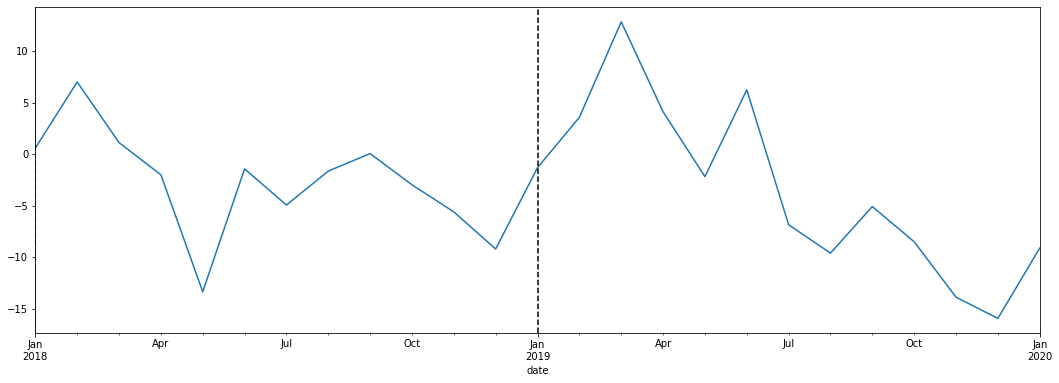

In [122]:
residuals.plot(figsize=(18,6))
for year in range(2011,2020):
    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color= 'k',linestyle = '--')
plt.show()

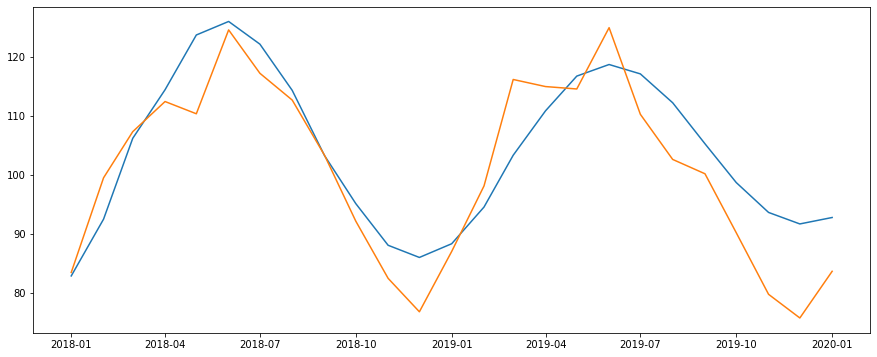

In [123]:
plt.figure(figsize=(15,6))
plt.plot(prediction)
plt.plot(test_data)
plt.show()

In [60]:
cat_data = pd.read_csv('catfish.csv')

In [61]:
cat_data.head()

,Date,Total
0,1986-1-01,9034
1,1986-2-01,9596
2,1986-3-01,10558
3,1986-4-01,9002
4,1986-5-01,9239


In [62]:
cat_data.isna().sum()

Date     0
Total    0
dtype: int64

In [63]:
cat_data.Date = pd.to_datetime(cat_data.Date)

In [64]:
cat_data.set_index('Date', inplace=True)

In [65]:
cat_data = cat_data.asfreq('MS')

In [66]:
cat_data.isna().sum()

Total    0
dtype: int64

In [67]:
cat_data.index[0].year

1986

In [68]:
cat_data.index[-1].year

2012

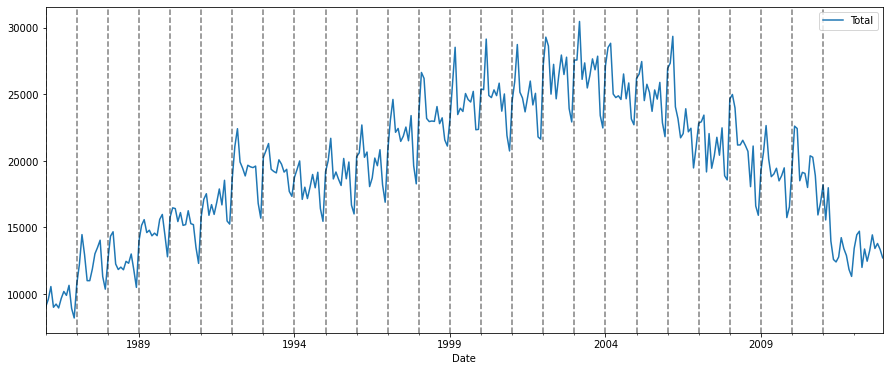

In [69]:
cat_data.plot(figsize=(15,6))
for year in range(1986,2012):
    plt.axvline(pd.to_datetime(str(year) + '-01-01') , color = 'k', linestyle = '--', alpha= 0.5)

E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Ma

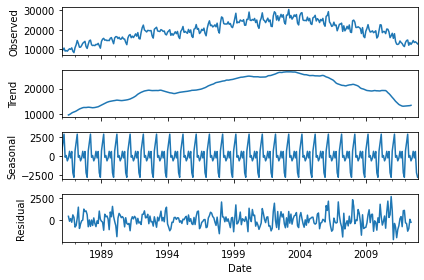

In [70]:
cat_decompose = seasonal_decompose(cat_data)
cat_decompose.plot()
plt.show()

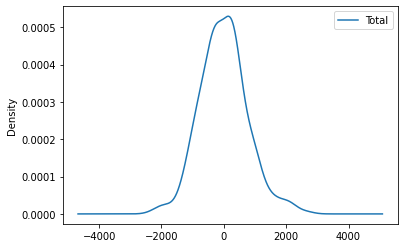

In [71]:
cat_decompose.resid.plot(kind = 'kde')

In [72]:
start_date = pd.to_datetime('1996-01-01')
end_date = pd.to_datetime('2000-01-01')
cat_data_slice = cat_data[start_date:end_date]

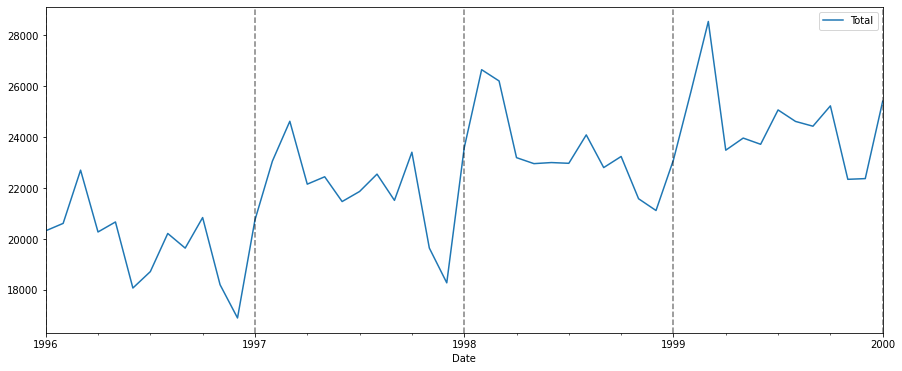

In [73]:
cat_data_slice.plot(figsize=(15,6))
for year in range(1986,2012):
    plt.axvline(pd.to_datetime(str(year) + '-01-01') , color = 'k', linestyle = '--', alpha= 0.5)

In [305]:
first_diff = cat_data_slice.diff()[1:]

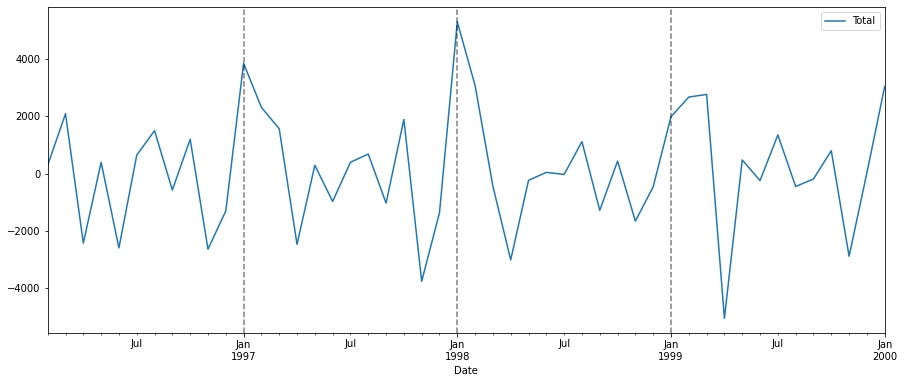

In [306]:
first_diff.plot(figsize=(15,6))
for year in range(1996,2000):
    plt.axvline(pd.to_datetime(str(year) + '-01-01') , color = 'k', linestyle = '--', alpha= 0.5)

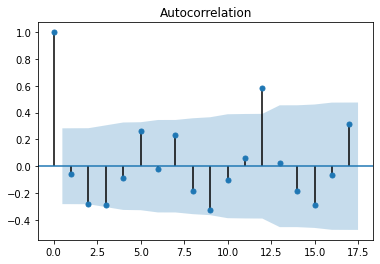

In [307]:
sgt.plot_acf(first_diff)
plt.show()

E:\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


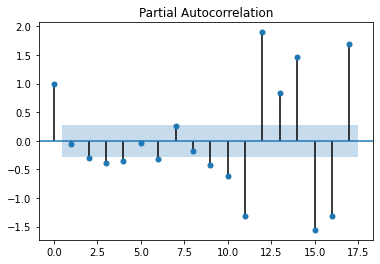

In [308]:
sgt.plot_pacf(first_diff)
plt.show()

In [309]:
split_date = pd.to_datetime('1999-07-01')
train_data = first_diff[:split_date]
test_data = first_diff[split_date:]

In [310]:
sarima_model = SARIMAX(train_data,order=(0,1,0), seasonal_order=(1,0,1,12))

In [311]:
sarima_model_fit = sarima_model.fit()

E:\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
E:\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [312]:
sarima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Total   No. Observations:                   42
Model:             SARIMAX(0, 1, 0)x(1, 0, 1, 12)   Log Likelihood                -372.981
Date:                            Tue, 04 Aug 2020   AIC                            751.961
Time:                                    21:33:44   BIC                            757.102
Sample:                                02-01-1996   HQIC                           753.833
                                     - 07-01-1999                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9987      0.009    110.550      0.000       0.981       1.016
ma.S.L12      -0.9135      0.297     -3.076      0.002      -1.495      -0.332
sigma2      2.554e+06   1.25e-07   2.04e+13      0.000    2.55e+06    2.55e+06
===================================================================================
Ljung-Box (Q):                       47.04   Jarque-Bera (JB):                 1.57
Prob(Q):                              0.21   Prob(JB):                         0.46
Heteroskedasticity (H):               1.37   Skew:                            -0.45
Prob(H) (two-sided):                  0.57   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.52e+30. Standard errors may be unstable.
"""

In [313]:
pred = sarima_model_fit.forecast(len(test_data))

In [314]:
pred

1999-08-01    2036.997357
1999-09-01     177.760999
1999-10-01    2103.136650
1999-11-01   -1367.427988
1999-12-01     110.484202
2000-01-01    4382.468204
2000-02-01    3677.451996
Freq: MS, dtype: float64

In [315]:
residual = test_data.Total - pred

In [316]:
residual

1999-07-01            NaN
1999-08-01   -2487.997357
1999-09-01    -365.760999
1999-10-01   -1304.136650
1999-11-01   -1517.572012
1999-12-01     -82.484202
2000-01-01   -1342.468204
2000-02-01            NaN
Freq: MS, dtype: float64

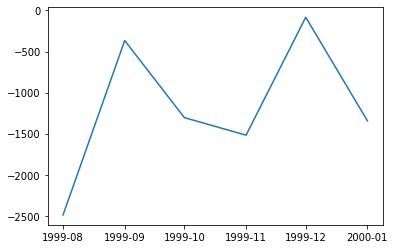

In [317]:
plt.plot(residual)

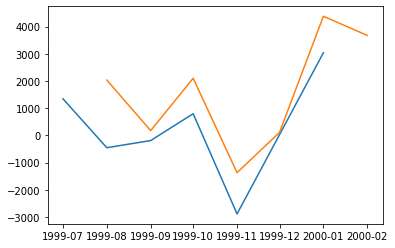

In [318]:
plt.plot(test_data)
plt.plot(pred)

In [319]:
pred

1999-08-01    2036.997357
1999-09-01     177.760999
1999-10-01    2103.136650
1999-11-01   -1367.427988
1999-12-01     110.484202
2000-01-01    4382.468204
2000-02-01    3677.451996
Freq: MS, dtype: float64

In [327]:
trend = cat_decompose.trend[pd.to_datetime('1999-08-01'): pd.to_datetime('2000-02-01')]

In [335]:
trend

,Total
Date,
1999-08-01,24563.083333
1999-09-01,24571.041667
1999-10-01,24656.583333
1999-11-01,24749.708333
1999-12-01,24850.583333
2000-01-01,24911.583333
2000-02-01,24956.208333


In [336]:
pred_org = pred + pred[1] + trend.Total

In [337]:
pred_org

1999-08-01    26777.841689
1999-09-01    24926.563664
1999-10-01    26937.480982
1999-11-01    23560.041344
1999-12-01    25138.828534
2000-01-01    29471.812536
2000-02-01    28811.421328
Freq: MS, dtype: float64

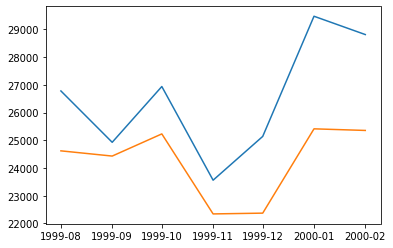

In [339]:

plt.plot(pred_org)
plt.plot(cat_data[pd.to_datetime('1999-08-01'): pd.to_datetime('2000-02-01')])
plt.show()

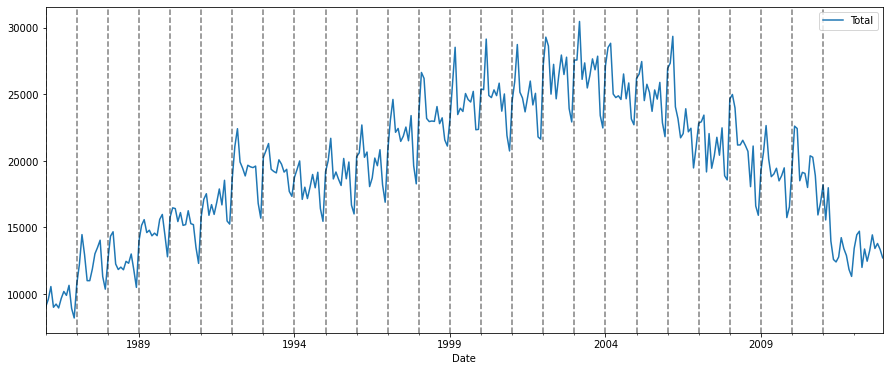

In [169]:
cat_data.plot(figsize=(15,6))
for year in range(1986,2012):
    plt.axvline(pd.to_datetime(str(year) + '-01-01') , color = 'k', linestyle = '--', alpha= 0.5)

In [170]:
cat_data_slice2 = cat_data[pd.to_datetime('2000-01-01'):pd.to_datetime('2004-01-01')]

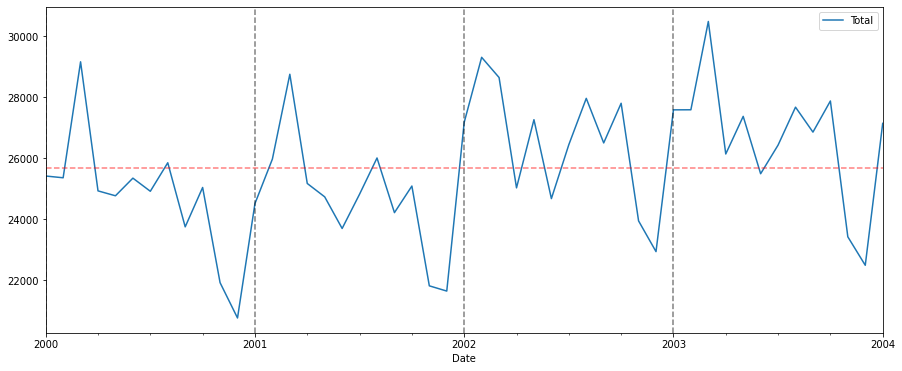

In [172]:
cat_data_slice2.plot(figsize=(15,6))
for year in range(2000,2004):
    plt.axvline(pd.to_datetime(str(year) + '-01-01') , color = 'k', linestyle = '--', alpha= 0.5)
plt.axhline(cat_data_slice2.Total.mean(), color = 'r', linestyle = '--' , alpha=0.5)

In [173]:
first_diff = cat_data_slice2.diff()[1:]

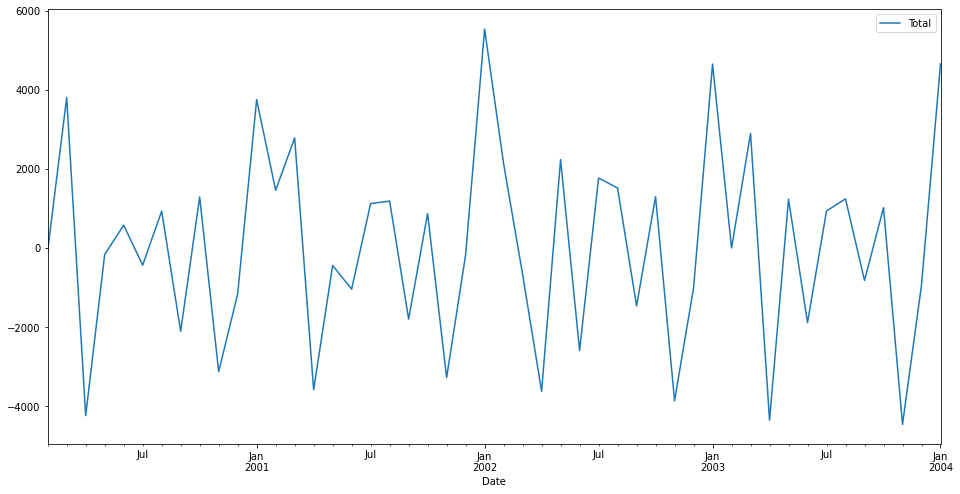

In [175]:
first_diff.plot(figsize=(16,8))

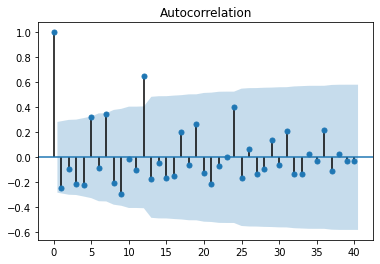

In [177]:
sgt.plot_acf(first_diff, lags=40)
plt.show()

E:\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


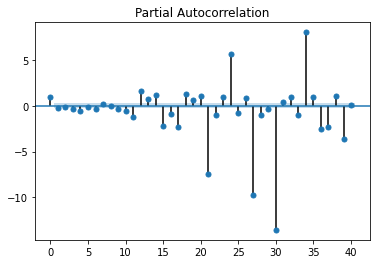

In [179]:
sgt.plot_pacf(first_diff, lags= 40)
plt.show()

In [180]:
train_data = first_diff[:pd.to_datetime('2003-01-01')]
test_data = first_diff[pd.to_datetime('2003-01-01'):]

In [181]:
arma41 = ARMA(train_data, order=(4,1))

In [182]:
arma41_fit = arma41.fit()

In [183]:
arma41_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Total   No. Observations:                   36
Model:                     ARMA(4, 1)   Log Likelihood                -323.617
Method:                       css-mle   S.D. of innovations           1888.106
Date:                Mon, 03 Aug 2020   AIC                            661.235
Time:                        21:25:53   BIC                            672.319
Sample:                    02-01-2000   HQIC                           665.103
                         - 01-01-2003                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.5984    148.292      0.112      0.912    -274.048     307.245
ar.L1.Total    -0.8658      0.188     -4.597      0.000      -1.235      -0.497
ar.L2.Total    -0.5159      0.189     -2.730      0.010      -0.886      -0.146
ar.L3.Total    -0.5464      0.188     -2.906      0.007      -0.915      -0.178
ar.L4.Total    -0.5948      0.142     -4.197      0.000      -0.873      -0.317
ma.L1.Total     0.5913      0.216      2.740      0.010       0.168       1.014
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9267           -0.5894j            1.0983           -0.4098
AR.2           -0.9267           +0.5894j            1.0983            0.4098
AR.3            0.4674           -1.0841j            1.1805           -0.1852
AR.4            0.4674           +1.0841j            1.1805            0.1852
MA.1           -1.6912           +0.0000j            1.6912            0.5000
-----------------------------------------------------------------------------
"""

In [189]:
pred = arma41_fit.predict(start= pd.to_datetime('2003-02-01'), end=pd.to_datetime('2004-01-01'))

In [190]:
pred

2003-02-01    -257.847313
2003-03-01     728.836062
2003-04-01   -2382.395889
2003-05-01    -882.349857
2003-06-01    1806.475100
2003-07-01    -182.037620
2003-08-01    1183.422252
2003-09-01   -1334.433605
2003-10-01    -371.782086
2003-11-01     530.355285
2003-12-01    -183.649722
2004-01-01     940.780871
Freq: MS, dtype: float64

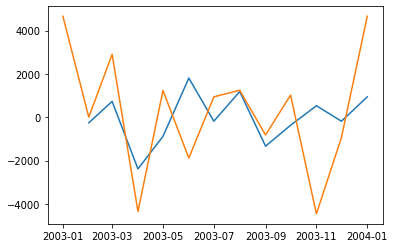

In [191]:
plt.plot(pred)
plt.plot(test_data)
plt.show()

In [290]:
pred

1999-08-01    2036.997357
1999-09-01     177.760999
1999-10-01    2103.136650
1999-11-01   -1367.427988
1999-12-01     110.484202
2000-01-01    4382.468204
2000-02-01    3677.451996
Freq: MS, dtype: float64

Using Holt winter

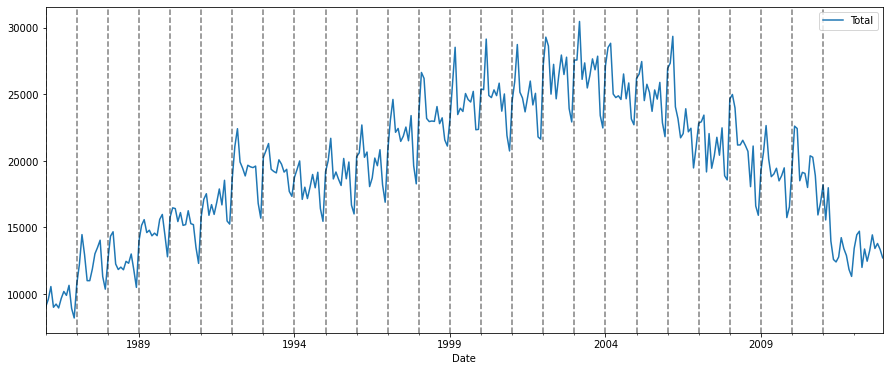

In [74]:
cat_data.plot(figsize=(15,6))
for year in range(1986,2012):
    plt.axvline(pd.to_datetime(str(year) + '-01-01') , color = 'k', linestyle = '--', alpha= 0.5)

In [75]:
split_date = pd.to_datetime('1994-01-01')
train_data = cat_data[:split_date]
test_data = cat_data[split_date:pd.to_datetime('1999-01-01')]

In [106]:
cat_holtw = hw_exponential(train_data.Total.astype(float), seasonal_periods=12,damped=False,trend = 'multiplicative', seasonal='multiplicative').fit()

In [107]:
pred = cat_holtw.predict(start = split_date, end =pd.to_datetime('1999-01-01') )

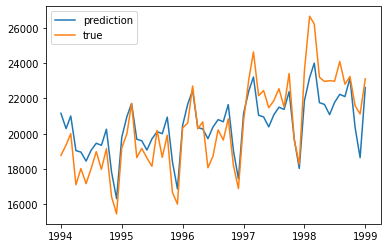

In [108]:
plt.plot(pred)
plt.plot(test_data)
plt.legend(['prediction', 'true'])

In [111]:
filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv'
data = pd.read_csv(filepath, parse_dates=['date'], index_col='date')
print(data.shape)  # (123, 8)
data.tail()

(123, 8)


,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1988-07-01,4042.7,3971.9,179.6,131.5,124.9,106.2,123.5,92.8
1988-10-01,4069.4,3995.8,181.3,133.3,126.2,107.3,124.9,92.9
1989-01-01,4106.8,4019.9,184.1,134.8,127.7,109.5,126.6,94.0
1989-04-01,4132.5,4044.1,186.1,134.8,129.3,111.1,129.0,100.6
1989-07-01,4162.9,4068.4,187.4,137.2,130.2,109.8,129.9,98.2


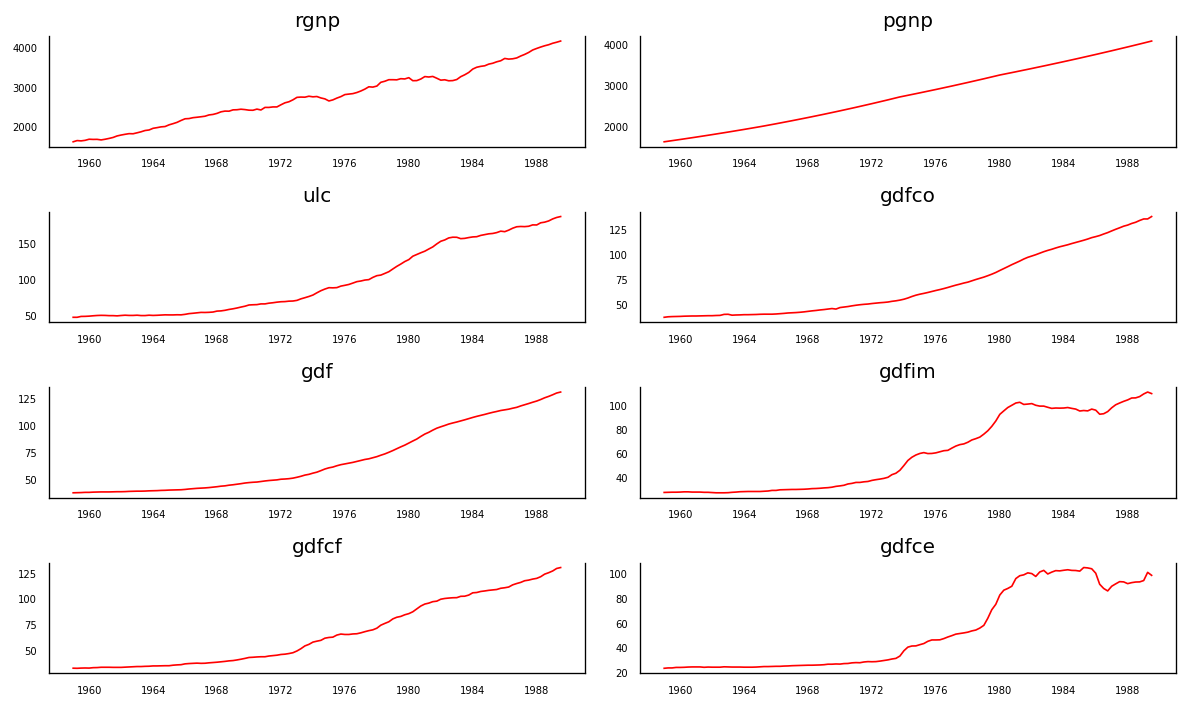

In [112]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    df = data[data.columns[i]]
    ax.plot(df, color='red', linewidth=1)
    # Decorations
    ax.set_title(data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

### null hypothesis of granger causality:x is not granger causality of y

In [127]:
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(data, variables = data.columns) 

,rgnp_x,pgnp_x,ulc_x,gdfco_x,gdf_x,gdfim_x,gdfcf_x,gdfce_x
rgnp_y,1.0000,0.0003,0.0001,0.0212,0.0014,0.0620,0.0001,0.0071
pgnp_y,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
ulc_y,0.0000,0.0000,1.0000,0.0002,0.0000,0.0000,0.0000,0.0041
gdfco_y,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
gdf_y,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
gdfim_y,0.0011,0.0067,0.0014,0.0083,0.0011,1.0000,0.0004,0.0000
gdfcf_y,0.0000,0.0000,0.0008,0.0008,0.0000,0.0038,1.0000,0.0009
gdfce_y,0.0025,0.0485,0.0000,0.0002,0.0000,0.0000,0.0000,1.0000


In [129]:
def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(data)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
rgnp   ::  248.0     > 143.6691  =>   True
pgnp   ::  183.12    > 111.7797  =>   True
ulc    ::  130.01    > 83.9383   =>   True
gdfco  ::  85.28     > 60.0627   =>   True
gdf    ::  55.05     > 40.1749   =>   True
gdfim  ::  31.59     > 24.2761   =>   True
gdfcf  ::  14.06     > 12.3212   =>   True
gdfce  ::  0.45      > 4.1296    =>   False


In [130]:
nobs = 4
df_train, df_test = data[0:-nobs], data[-nobs:]

In [133]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = sts.adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [134]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "rgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.5428
 No. Lags Chosen       = 2
 Critical value 1%     = -3.488
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.9861. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "pgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.1556
 No. Lags Chosen       = 1
 Critical value 1%     = -3.488
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.9957. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ulc" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. N

In [135]:
df_differenced = df_train.diff().dropna()

In [136]:
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "rgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.3448
 No. Lags Chosen       = 1
 Critical value 1%     = -3.488
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "pgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.8282
 No. Lags Chosen       = 0
 Critical value 1%     = -3.488
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.3666. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ulc" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signifi

In [137]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [138]:
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "rgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.0123
 No. Lags Chosen       = 2
 Critical value 1%     = -3.489
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "pgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.9813
 No. Lags Chosen       = 0
 Critical value 1%     = -3.488
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ulc" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 T

In [141]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -1.3679402315450646
BIC :  0.34118471465888556
FPE :  0.25526825173472023
HQIC:  -0.6741331335699536 

Lag Order = 2
AIC :  -1.6212373944478253
BIC :  1.6249432095295835
FPE :  0.20113494371371365
HQIC:  -0.30362888267959365 

Lag Order = 3
AIC :  -1.76580083870128
BIC :  3.0345473163767824
FPE :  0.18125103746164348
HQIC:  0.18239143783963208 

Lag Order = 4
AIC :  -2.000735164470316
BIC :  4.371215137654089
FPE :  0.15556966521481125
HQIC:  0.5849359332771087 

Lag Order = 5
AIC :  -1.9619535608363963
BIC :  5.999364562242095
FPE :  0.1869279438911487
HQIC:  1.268206331178332 

Lag Order = 6
AIC :  -2.330338652482907
BIC :  7.238452689088579
FPE :  0.16380374017443636
HQIC:  1.5514371669548055 

Lag Order = 7
AIC :  -2.5923313523471254
BIC :  8.602387254937799
FPE :  0.18238685837154206
HQIC:  1.9483069621146587 

Lag Order = 8
AIC :  -3.3172619764582016
BIC :  9.522195810323034
FPE :  0.15573163248209143
HQIC:  1.889607138622102 

Lag Order = 9
AIC :  -4.8047631

E:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [142]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,-0.07898,0.1232,0.9241,0.002961
1,-0.5721,1.248,0.5662,0.1653
2,-0.8256,2.612,0.4482,0.5674
3,-1.007,4.048,0.3937,1.042
4,-1.255,5.418,0.3399,1.449
5,-1.230,7.060,0.4147,2.129
6,-1.739,8.169,0.3286,2.276
7,-2.142,9.384,0.3340,2.528
8,-2.964,10.18,0.2744,2.362
9,-4.562,10.20,0.1413,1.420


In [143]:
model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 05, Aug, 2020
Time:                     16:35:22
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    4.37122
Nobs:                     113.000    HQIC:                  0.584936
Log likelihood:          -905.679    FPE:                   0.155570
AIC:                     -2.00074    Det(Omega_mle):       0.0200322
--------------------------------------------------------------------
Results for equation rgnp
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            2.430021         2.677505            0.908           0.364
L1.rgnp         -0.750066         0.159023           -4.717           0.000
L1.pgnp         -0.095621         4.938865           -0.019           0.985
L1.ul

durbin watson is a test for checking if there is a pattern in residuals or no. we want that he results stay about 2

In [148]:
out = durbin_watson(model_fitted.resid)

for col, val in zip(data.columns, out):
    print(col, ':', round(val, 2))

rgnp : 2.09
pgnp : 2.02
ulc : 2.17
gdfco : 2.05
gdf : 2.25
gdfim : 1.99
gdfcf : 2.2
gdfce : 2.17


In [149]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

4


array([[ 13.5,   0.1,   1.4,   0.1,   0.1,  -0.1,   0.4,  -2. ],
       [-23.6,   0.2,  -2. ,  -0.5,  -0.1,  -0.2,  -0.3,  -1.2],
       [ -3.3,   0.1,   3.1,   0.5,   0.3,   0.4,   0.9,   2.2],
       [ -3.9,   0.2,  -2.1,  -0.4,   0.2,  -1.5,   0.9,  -0.3]])

In [151]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=data.index[-nobs:], columns=data.columns + '_2d')
df_forecast

,rgnp_2d,pgnp_2d,ulc_2d,gdfco_2d,gdf_2d,gdfim_2d,gdfcf_2d,gdfce_2d
date,,,,,,,,
1988-10-01,48.322456,1.250774,0.595993,0.265657,-0.104146,0.304119,-0.917227,-0.113061
1989-01-01,-34.962286,-0.387966,-0.329877,-0.042217,0.164633,1.357223,0.618163,3.029975
1989-04-01,20.392680,0.291298,0.390812,-0.134488,-0.486073,-0.149551,-1.238234,-2.345223
1989-07-01,-37.416599,-0.280943,0.367912,0.102797,0.333371,-0.502103,0.469468,0.517424


In [152]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [154]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['rgnp_forecast', 'pgnp_forecast', 'ulc_forecast', 'gdfco_forecast',
                   'gdf_forecast', 'gdfim_forecast', 'gdfcf_forecast', 'gdfce_forecast']]

,rgnp_forecast,pgnp_forecast,ulc_forecast,gdfco_forecast,gdf_forecast,gdfim_forecast,gdfcf_forecast,gdfce_forecast
date,,,,,,,,
1988-10-01,4123.022456,3996.950774,181.095993,132.965657,126.395854,106.604119,125.082773,93.186939
1989-01-01,4168.382626,4021.613582,182.262108,134.389097,128.056341,108.365461,127.283708,96.603854
1989-04-01,4234.135476,4046.567687,183.819036,135.678050,129.230756,109.977252,128.246409,97.675545
1989-07-01,4262.471728,4071.240850,185.743875,137.069799,130.738542,111.086940,129.678579,99.264661


E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Ma

E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Ma

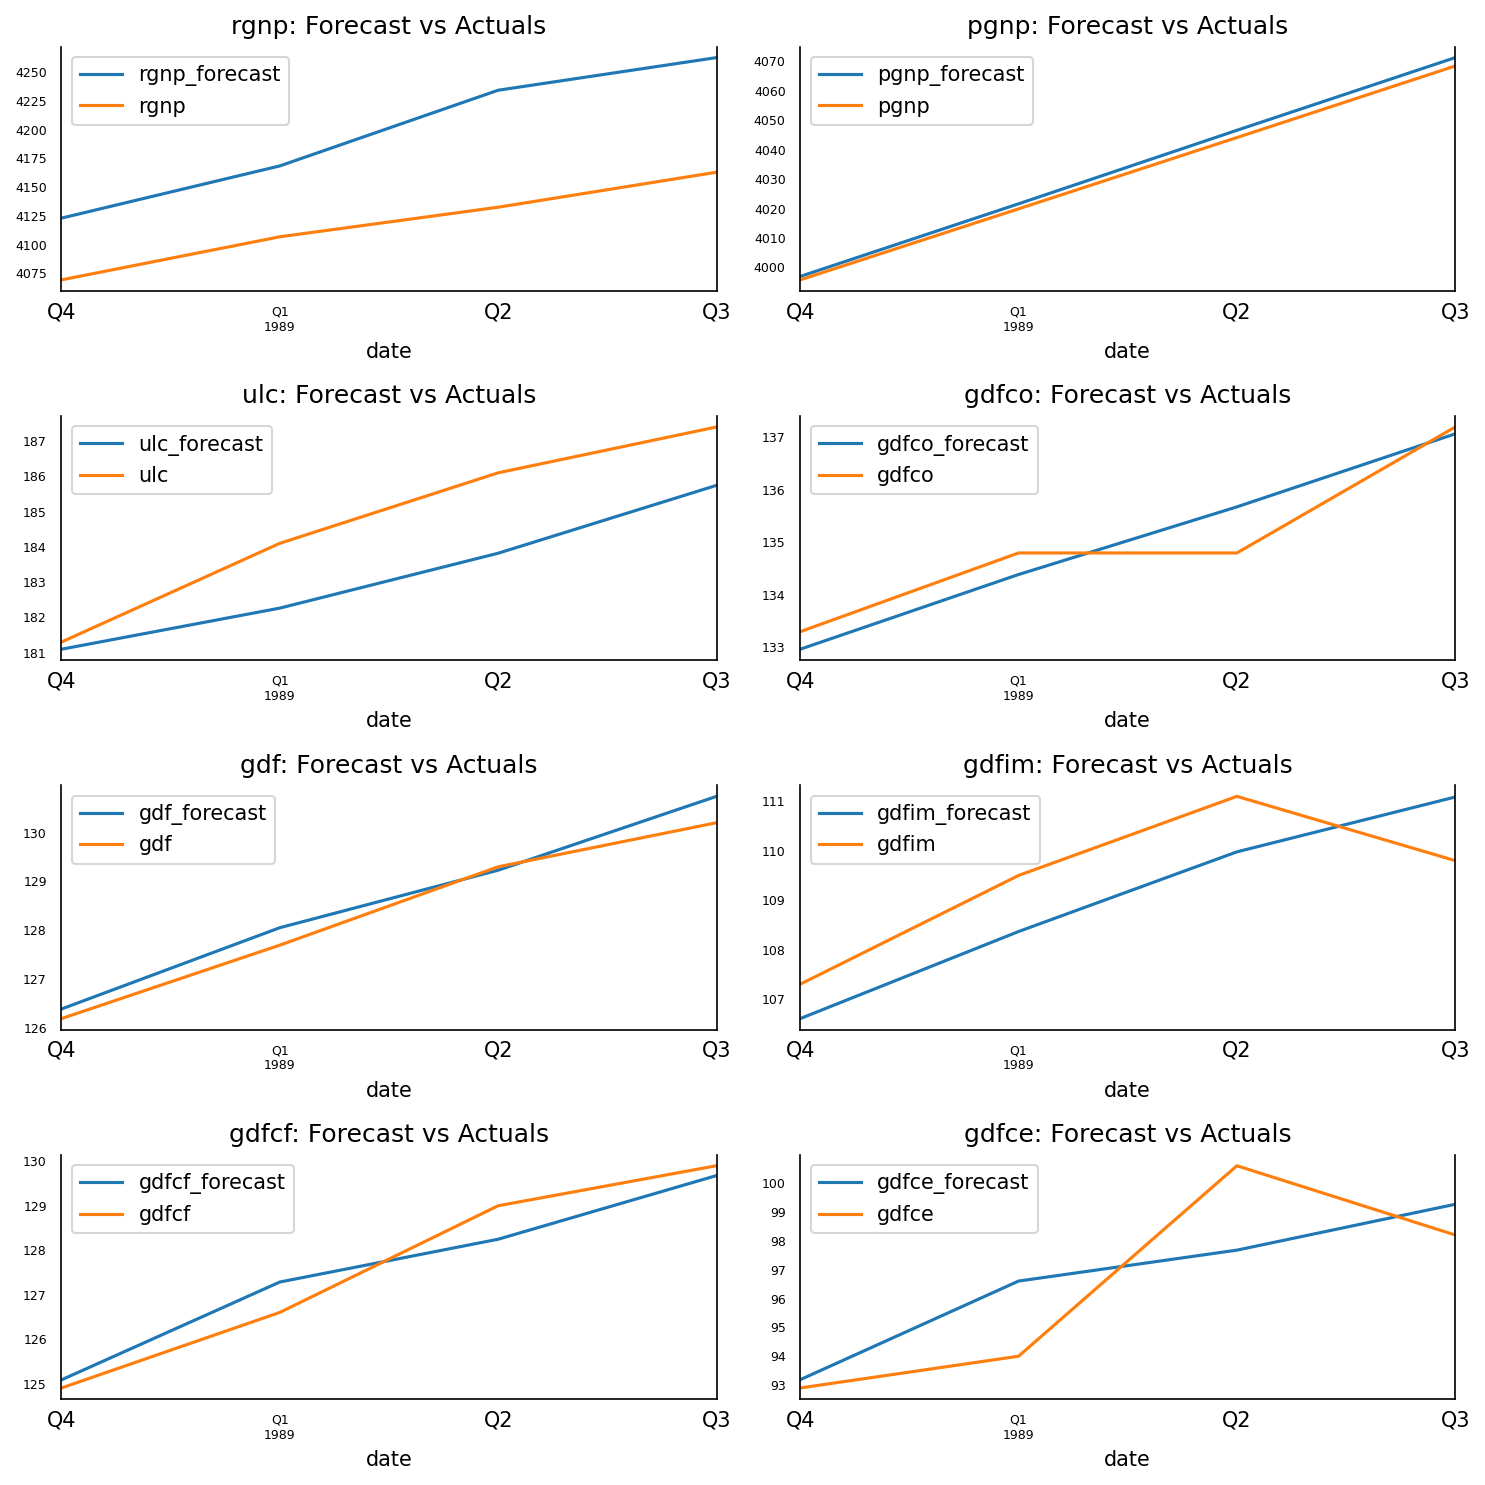

In [156]:
fig, axes = plt.subplots(nrows=int(len(data.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(data.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [158]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: rgnp')
accuracy_prod = forecast_accuracy(df_results['rgnp_forecast'].values, df_test['rgnp'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: pgnp')
accuracy_prod = forecast_accuracy(df_results['pgnp_forecast'].values, df_test['pgnp'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: ulc')
accuracy_prod = forecast_accuracy(df_results['ulc_forecast'].values, df_test['ulc'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: gdfco')
accuracy_prod = forecast_accuracy(df_results['gdfco_forecast'].values, df_test['gdfco'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: gdf')
accuracy_prod = forecast_accuracy(df_results['gdf_forecast'].values, df_test['gdf'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: gdfim')
accuracy_prod = forecast_accuracy(df_results['gdfim_forecast'].values, df_test['gdfim'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: gdfcf')
accuracy_prod = forecast_accuracy(df_results['gdfcf_forecast'].values, df_test['gdfcf'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: gdfce')
accuracy_prod = forecast_accuracy(df_results['gdfce_forecast'].values, df_test['gdfce'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

Forecast Accuracy of: rgnp
mape :  0.0192
me :  79.1031
mae :  79.1031
mpe :  0.0192
rmse :  82.0245
corr :  0.9849
minmax :  0.0188

Forecast Accuracy of: pgnp
mape :  0.0005
me :  2.0432
mae :  2.0432
mpe :  0.0005
rmse :  2.146
corr :  1.0
minmax :  0.0005

Forecast Accuracy of: ulc
mape :  0.0081
me :  -1.4947
mae :  1.4947
mpe :  -0.0081
rmse :  1.6856
corr :  0.963
minmax :  0.0081

Forecast Accuracy of: gdfco
mape :  0.0033
me :  0.0007
mae :  0.4384
mpe :  0.0
rmse :  0.5169
corr :  0.9407
minmax :  0.0032

Forecast Accuracy of: gdf
mape :  0.0023
me :  0.2554
mae :  0.29
mpe :  0.002
rmse :  0.3392
corr :  0.9905
minmax :  0.0022

Forecast Accuracy of: gdfim
mape :  0.0097
me :  -0.4166
mae :  1.06
mpe :  -0.0038
rmse :  1.0826
corr :  0.807
minmax :  0.0096

Forecast Accuracy of: gdfcf
mape :  0.0036
me :  -0.0271
mae :  0.4604
mpe :  -0.0002
rmse :  0.5286
corr :  0.9713
minmax :  0.0036

Forecast Accuracy of: gdfce
mape :  0.0177
me :  0.2577
mae :  1.72
mpe :  0.0031
rmse 